# ĐỀ KIỂM TRA THỰC HÀNH 1 
## Môn: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 09/10/2024
## Lớp: DHKHDL18A. Nhóm thực hành 3.
## Thời gian: 45 phút

### Câu 1. (6 điểm) ### 
Cho ma trận $A=\begin{bmatrix}3 & 0\\ 0 & 1 \end{bmatrix}$ và vector $b=(2;-1)$. Xét bài toán tối ưu sau 
$$\min_{x\in\mathbb{R}^2}f(x)=\dfrac{1}{2}x^TAx-b^Tx.$$

1. (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.


2. (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(0;1)$, sử dụng learning rate là $0.9$ và thực hiện tối đa $20$ vòng lặp. In ra giá trị của $x^{(k)}$ và $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$. Từ đó vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-f(p^*)|$.


3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(0;1)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$.  


===== NGHIỆM GIẢI TÍCH =====
x* = [ 0.66666667 -1.        ]
p* = -1.1666666666666665

===== GRADIENT DESCENT (FIXED LR) =====
Iter  1: x = [ 1.8 -0.8], f(x) = 0.780000
Iter  2: x = [-1.26 -0.98], f(x) = 4.401600
Iter  3: x = [ 3.942 -0.998], f(x) = 14.925048
Iter  4: x = [-4.9014 -0.9998], f(x) = 45.338383
Iter  5: x = [10.13238 -0.99998], f(x) = 133.232927
Iter  6: x = [-15.425046  -0.999998], f(x) = 387.248158
Iter  7: x = [28.0225782 -0.9999998], f(x) = 1121.352177
Iter  8: x = [-45.83838294  -0.99999998], f(x) = 3242.912792
Iter  9: x = [79.725251 -1.      ], f(x) = 9374.222968
Iter 10: x = [-133.7329267   -1.       ], f(x) = 27093.709378
Iter 11: x = [229.14597538  -1.        ], f(x) = 78303.025101
Iter 12: x = [-387.74815815   -1.        ], f(x) = 226297.947543
Iter 13: x = [660.97186886  -1.        ], f(x) = 654003.273399
Iter 14: x = [-1.12185218e+03 -1.00000000e+00], f(x) = 1890071.665125
Iter 15: x = [ 1.9089487e+03 -1.0000000e+00], f(x) = 5462309.317210
Iter 16: x = [-3.2434

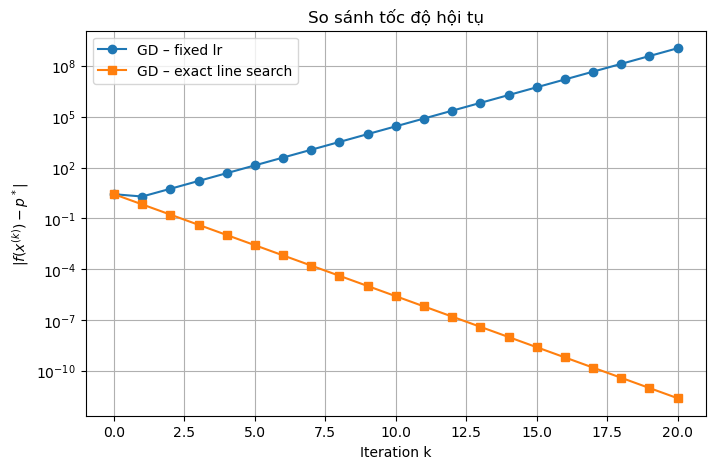

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# =========================
# 1. Khai báo bài toán
# =========================
def create_problem(A, b):
    """
    Tạo hàm f(x) = 1/2 x^T A x - b^T x
    """
    def f(x):
        return 0.5 * x @ A @ x - b @ x
    return f

# =========================
# 2. Gradient Descent (fixed lr)
# =========================
def gradient_descent(f, grad_f, x0, lr, max_iter):
    x = x0.copy()
    xs, fs = [x.copy()], [f(x)]
    
    for k in range(max_iter):
        x = x - lr * grad_f(x)
        xs.append(x.copy())
        fs.append(f(x))
        
        print(f"Iter {k+1:2d}: x = {x}, f(x) = {fs[-1]:.6f}")
        
    return np.array(xs), np.array(fs)

# =========================
# 3. Gradient Descent với Exact Line Search
# =========================
def gradient_descent_exact(A, f, grad_f, x0, max_iter):
    x = x0.copy()
    xs, fs = [x.copy()], [f(x)]
    
    for k in range(max_iter):
        g = grad_f(x)
        alpha = (g @ g) / (g @ A @ g)
        x = x - alpha * g
        
        xs.append(x.copy())
        fs.append(f(x))
        
        print(f"Iter {k+1:2d}: alpha = {alpha:.6f}, x = {x}, f(x) = {fs[-1]:.6f}")
        
    return np.array(xs), np.array(fs)

# =========================
# 4. MAIN – chạy bài toán
# =========================
if __name__ == "__main__":
    
    # ----- INPUT (chỉ cần đổi chỗ này) -----
    A = np.array([[3., 0.],
                  [0., 1.]])
    
    b = np.array([2., -1.])
    x0 = np.array([0., 1.])
    
    lr = 0.9
    max_iter = 20
    
    # ----- Tạo hàm và gradient -----
    f = create_problem(A, b)
    grad_f = grad(f)
    
    # ----- Nghiệm tối ưu -----
    x_star = np.linalg.solve(A, b)
    p_star = f(x_star)
    
    print("===== NGHIỆM GIẢI TÍCH =====")
    print("x* =", x_star)
    print("p* =", p_star)
    
    # ----- Gradient Descent thường -----
    print("\n===== GRADIENT DESCENT (FIXED LR) =====")
    xs_gd, fs_gd = gradient_descent(f, grad_f, x0, lr, max_iter)
    
    # ----- Exact Line Search -----
    print("\n===== GRADIENT DESCENT (EXACT LINE SEARCH) =====")
    xs_exact, fs_exact = gradient_descent_exact(A, f, grad_f, x0, max_iter)
    
    # =========================
    # 5. Vẽ đồ thị sai số
    # =========================
    err_gd = np.abs(fs_gd - p_star)
    err_exact = np.abs(fs_exact - p_star)
    
    plt.figure(figsize=(8, 5))
    plt.semilogy(err_gd, 'o-', label='GD – fixed lr')
    plt.semilogy(err_exact, 's-', label='GD – exact line search')
    plt.xlabel("Iteration k")
    plt.ylabel(r"$|f(x^{(k)}) - p^*|$")
    plt.title("So sánh tốc độ hội tụ")
    plt.grid(True)
    plt.legend()
    plt.show()


In [2]:
import autograd.numpy as np
from autograd import grad

# =====================================================
# 1. Định nghĩa bài toán f(x) = 1/2 x^T A x - b^T x
# =====================================================
def create_quadratic_problem(A, b):
    def f(x):
        return 0.5 * x @ A @ x - b @ x
    return f

# =====================================================
# 2. Exact Line Search – in rõ từng bước
# =====================================================
def exact_line_search_steps(A, f, grad_f, x0, max_iter=1):
    """
    Trình bày chi tiết từng bước tìm alpha theo exact line search
    """
    x = x0.copy()

    print("========== EXACT LINE SEARCH ==========")
    print(f"x^(0) = {x}")

    for k in range(max_iter):
        print(f"\n--- Bước lặp k = {k} ---")

        # Gradient
        g = grad_f(x)
        print("Gradient ∇f(x^k) = A x^k - b =", g)

        # Tử số
        numerator = g @ g
        print("Tử số  ∇f^T ∇f =", numerator)

        # Mẫu số
        Ag = A @ g
        denominator = g @ Ag
        print("Mẫu số  ∇f^T A ∇f =", denominator)

        # Learning rate exact
        alpha = numerator / denominator
        print("Learning rate α_exact =", alpha)

        # Cập nhật x
        x_new = x - alpha * g
        print("x^(k+1) = x^k − α ∇f =", x_new)

        # Giá trị hàm
        fx = f(x_new)
        print("f(x^(k+1)) =", fx)

        x = x_new

    return x

# =====================================================
# 3. MAIN – chỉ cần đổi dữ liệu đầu vào
# =====================================================
if __name__ == "__main__":

    # ----- INPUT -----
    A = np.array([[3., 0.],
                  [0., 1.]])
    b = np.array([2., -1.])
    x0 = np.array([0., 1.])

    # ----- Tạo hàm và gradient -----
    f = create_quadratic_problem(A, b)
    grad_f = grad(f)

    # ----- Chạy exact line search (1 bước như đề) -----
    exact_line_search_steps(A, f, grad_f, x0, max_iter=1)


========== EXACT LINE SEARCH ==========
x^(0) = [0. 1.]

--- Bước lặp k = 0 ---
Gradient ∇f(x^k) = A x^k - b = [-2.  2.]
Tử số  ∇f^T ∇f = 8.0
Mẫu số  ∇f^T A ∇f = 16.0
Learning rate α_exact = 0.5
x^(k+1) = x^k − α ∇f = [1. 0.]
f(x^(k+1)) = -0.5


1. (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa ma trận A và vector b
A = np.array([[3,0],[0,1]])
b = np.array([2,-1])

# Hàm mục tiêu f(x)
def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x

# Gradient của f(x)
def grad_f(x):
    return A @ x - b

# **Phần 1: Xác định điểm tối ưu x* và giá trị tối ưu p***

# Giải phương trình A*x* = b để tìm x*
x_star = np.linalg.solve(A, b)
f_star = f(x_star)

print("Phần 1:")
print(f"Điểm tối ưu x* = {x_star}")
print(f"Giá trị tối ưu p* = {f_star}\n")

Phần 1:
Điểm tối ưu x* = [ 0.66666667 -1.        ]
Giá trị tối ưu p* = -1.1666666666666665



Vậy điểm tối ưu của bài toán : $\displaystyle x^* = (\frac{2}{3}, -1)$ , giá trị tối ưu của bài toán là $p^* = \frac{-7}{6}$

2. (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(0;1)$, sử dụng learning rate là $0.9$ và thực hiện tối đa $20$ vòng lặp. In ra giá trị của $x^{(k)}$ và $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$. Từ đó vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-f(p^*)|$.


Phần 2: Gradient Descent với learning rate = 1
Vòng lặp 0: x = [0 1], f(x) = 1.5
Vòng lặp 1: x = [ 1.8 -0.8], f(x) = 0.7800000000000002
Vòng lặp 2: x = [-1.26 -0.98], f(x) = 4.401600000000002
Vòng lặp 3: x = [ 3.942 -0.998], f(x) = 14.925048000000002
Vòng lặp 4: x = [-4.9014 -0.9998], f(x) = 45.33838296000002
Vòng lặp 5: x = [10.13238 -0.99998], f(x) = 133.2329266968
Vòng lặp 6: x = [-15.425046  -0.999998], f(x) = 387.248158153176
Vòng lặp 7: x = [28.0225782 -0.9999998], f(x) = 1121.3521770626728
Vòng lặp 8: x = [-45.83838294  -0.99999998], f(x) = 3242.9127917111255
Vòng lặp 9: x = [79.725251 -1.      ], f(x) = 9374.222968045151
Vòng lặp 10: x = [-133.7329267   -1.       ], f(x) = 27093.709377650488
Vòng lặp 11: x = [229.14597538  -1.        ], f(x) = 78303.02510140995
Vòng lặp 12: x = [-387.74815815   -1.        ], f(x) = 226297.94754307473
Vòng lặp 13: x = [660.97186886  -1.        ], f(x) = 654003.273399486
Vòng lặp 14: x = [-1.12185218e+03 -1.00000000e+00], f(x) = 1890071.665124514

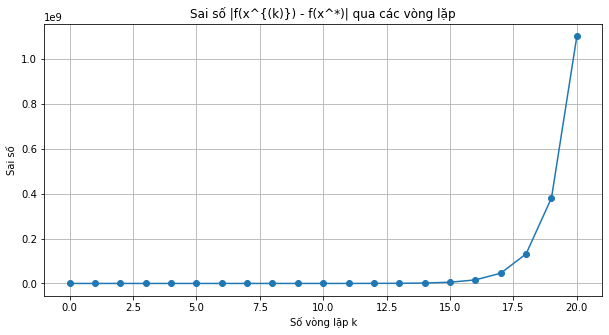

In [6]:
# Khởi tạo
x_0 = np.array([0, 1])  # Giá trị ban đầu x(0)
learning_rate = 0.9  # Learning rate cố định
max_iter = 20  # Số vòng lặp tối đa

# Danh sách lưu trữ các giá trị x(k) và f(x(k))
x_vals = [x_0]
f_vals = [f(x_0)]

# Gradient Descent
x = x_0
for k in range(max_iter):
    grad = grad_f(x)  # Tính gradient tại x(k)
    x = x - learning_rate * grad  # Cập nhật giá trị của x(k)
    x_vals.append(x)
    f_vals.append(f(x))

# In kết quả của từng vòng lặp
print("Phần 2: Gradient Descent với learning rate = 1")
for k in range(max_iter + 1):
    print(f"Vòng lặp {k}: x = {x_vals[k]}, f(x) = {f_vals[k]}")

# Vẽ đồ thị sai số |f(x^k) - f(x*)| theo số vòng lặp
errors = [abs(f_val - f_star) for f_val in f_vals]

plt.figure(figsize=(10, 5))
plt.plot(range(max_iter + 1), errors, marker='o')
plt.title("Sai số |f(x^{(k)}) - f(x^*)| qua các vòng lặp")
plt.xlabel("Số vòng lặp k")
plt.ylabel("Sai số")
plt.grid(True)
plt.show()

3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(0;1)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$.  

In [28]:
from sympy import symbols, diff, Matrix, solve, latex
from IPython.display import display, Markdown
# Khai báo các biến
x1, x2 = symbols('x1 x2')

# Ma trận A và vector b
A = Matrix([[3,0],[0,1]])
b = Matrix([2,-1])

# Hàm số f(x) = 1/2 * x^T * A * x - b^T * x
f = 1/2 * Matrix([x1, x2]).T * A * Matrix([x1, x2]) - b.T * Matrix([x1, x2])

# Tính đạo hàm của f theo từng biến
df_x1 = diff(f, x1)
df_x2 = diff(f, x2)

display(Markdown(f"Đạo hàm : ${latex(df_x1)}$"))
display(Markdown(f"Đạo hàm : ${latex(df_x2)}$"))

# Giải hệ phương trình đạo hàm bằng 0
sol = solve([df_x1, df_x2], [x1, x2])
sol, f.subs({x1: sol[x1], x2: sol[x2]})

Đạo hàm : $\left[\begin{matrix}3.0 x_{1} - 2\end{matrix}\right]$

Đạo hàm : $\left[\begin{matrix}1.0 x_{2} + 1\end{matrix}\right]$

({x1: 0.666666666666667, x2: -1.00000000000000}, Matrix([[-1.16666666666667]]))

In [29]:
s = symbols('s')
tk = Matrix([[x1],[x2]]) - s*Matrix([df_x1, df_x2])
tk

Matrix([
[-s*(3.0*x1 - 2) + x1],
[-s*(1.0*x2 + 1) + x2]])

In [30]:
nghiem_s = solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))
nghiem_s[0]

{s: (9.0*x1**2 - 12.0*x1 + x2**2 + 2.0*x2 + 5.0)/(27.0*x1**2 - 36.0*x1 + x2**2 + 2.0*x2 + 13.0)}

In [31]:
nabla = '\u2207'
display(Markdown(f" Điểm s để f(x-s.{nabla}.f(x)) nhỏ nhất là : $\displaystyle {latex(nghiem_s[0][s])}$"))

 Điểm s để f(x-s.∇.f(x)) nhỏ nhất là : $\displaystyle \frac{9.0 x_{1}^{2} - 12.0 x_{1} + x_{2}^{2} + 2.0 x_{2} + 5.0}{27.0 x_{1}^{2} - 36.0 x_{1} + x_{2}^{2} + 2.0 x_{2} + 13.0}$

In [32]:
nghiem_s[0][s].subs({x1 : 1 , x2: 0})

0.500000000000000

In [33]:
(f.subs({x1: tk[0], x2:tk[1]})).subs(*nghiem_s)

Matrix([[-2*x1 + x2 + 1.5*(x1 - (3.0*x1 - 2)*(9.0*x1**2 - 12.0*x1 + x2**2 + 2.0*x2 + 5.0)/(27.0*x1**2 - 36.0*x1 + x2**2 + 2.0*x2 + 13.0))**2 + 2*(3.0*x1 - 2)*(9.0*x1**2 - 12.0*x1 + x2**2 + 2.0*x2 + 5.0)/(27.0*x1**2 - 36.0*x1 + x2**2 + 2.0*x2 + 13.0) - (1.0*x2 + 1)*(9.0*x1**2 - 12.0*x1 + x2**2 + 2.0*x2 + 5.0)/(27.0*x1**2 - 36.0*x1 + x2**2 + 2.0*x2 + 13.0) + 0.5*(x2 - (1.0*x2 + 1)*(9.0*x1**2 - 12.0*x1 + x2**2 + 2.0*x2 + 5.0)/(27.0*x1**2 - 36.0*x1 + x2**2 + 2.0*x2 + 13.0))**2]])

In [34]:
t = nghiem_s[0][s].subs({x1:1,x2:0})
t

0.500000000000000

Code tính vòng lặp

In [8]:
x_0 = np.array([0, 1])
max_iter = 20  # Giới hạn số vòng lặp xuống còn 20

# Hàm mục tiêu
def f(x):
    return 0.5 * x.T @ A @ x - b.T @ x

# Tính gradient
def grad_f(x):
    return A @ x - b

# Tìm điểm tối ưu p*
p_star = np.linalg.solve(A, b)
f_star = f(p_star)

# Hàm exact-line search để tìm learning rate tối ưu
def exact_line_search(grad):
    return grad.T @ grad / (grad.T @ A @ grad)  # Công thức tìm learning rate tối ưu

# Danh sách lưu trữ các giá trị x(k) và f(x(k)) với exact-line search
x_vals_exact = [x_0]
f_vals_exact = [f(x_0)]
learning_rates = []  # Danh sách lưu learning rates

x = x_0
for k in range(max_iter):
    grad = grad_f(x)  # Tính gradient tại x(k)
    lr_exact = exact_line_search(grad)  # Tìm learning rate tối ưu
    learning_rates.append(lr_exact)  # Lưu learning rate
    x = x - lr_exact * grad  # Cập nhật giá trị của x(k) với learning rate tối ưu
    x_vals_exact.append(x)
    f_vals_exact.append(f(x))

# In kết quả của từng vòng lặp với exact-line search
print("\nPhần 3: Exact-line Search")
for k in range(max_iter + 1):
    print(f"Vòng lặp {k}: x = {x_vals_exact[k]}, f(x) = {f_vals_exact[k]}")

# In ra bước nhảy tại mỗi vòng lặp
print("\nBước nhảy (learning rates) tại mỗi vòng lặp:")
for k in range(max_iter):
    print(f"Vòng lặp {k}: learning rate = {learning_rates[k]}")


Phần 3: Exact-line Search
Vòng lặp 0: x = [0 1], f(x) = 1.5
Vòng lặp 1: x = [1. 0.], f(x) = -0.5
Vòng lặp 2: x = [ 0.5 -0.5], f(x) = -1.0
Vòng lặp 3: x = [ 0.75 -0.75], f(x) = -1.125
Vòng lặp 4: x = [ 0.625 -0.875], f(x) = -1.15625
Vòng lặp 5: x = [ 0.6875 -0.9375], f(x) = -1.1640625
Vòng lặp 6: x = [ 0.65625 -0.96875], f(x) = -1.166015625
Vòng lặp 7: x = [ 0.671875 -0.984375], f(x) = -1.16650390625
Vòng lặp 8: x = [ 0.6640625 -0.9921875], f(x) = -1.1666259765625
Vòng lặp 9: x = [ 0.66796875 -0.99609375], f(x) = -1.166656494140625
Vòng lặp 10: x = [ 0.66601562 -0.99804688], f(x) = -1.1666641235351562
Vòng lặp 11: x = [ 0.66699219 -0.99902344], f(x) = -1.166666030883789
Vòng lặp 12: x = [ 0.66650391 -0.99951172], f(x) = -1.1666665077209473
Vòng lặp 13: x = [ 0.66674805 -0.99975586], f(x) = -1.1666666269302368
Vòng lặp 14: x = [ 0.66662598 -0.99987793], f(x) = -1.1666666567325592
Vòng lặp 15: x = [ 0.66668701 -0.99993896], f(x) = -1.1666666641831398
Vòng lặp 16: x = [ 0.66665649 -0.9999

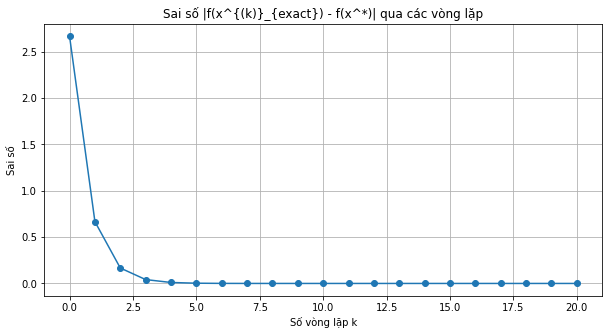

In [9]:
# Vẽ đồ thị sai số |f(x^k_exact) - f(x*)| theo số vòng lặp
errors_exact = [abs(f_val - f_star) for f_val in f_vals_exact]

plt.figure(figsize=(10, 5))
plt.plot(range(max_iter + 1), errors_exact, marker='o')
plt.title("Sai số |f(x^{(k)}_{exact}) - f(x^*)| qua các vòng lặp")
plt.xlabel("Số vòng lặp k")
plt.ylabel("Sai số")
plt.grid(True)
plt.show()

### Câu 2. (4 điểm)
Bộ dữ liệu **Labeled Faces in the Wild (LFW)**: Bộ dữ liệu là tập hợp các bức ảnh JPEG của những người nổi tiếng được thu thập trên internet. Sử dụng lệnh sau để load bộ dữ liệu
```python
from sklearn.datasets import fetch_lfw_people
lfwPeople = fetch_lfw_people(data_home="./",min_faces_per_person=70, resize=0.4)
````
1. Hiển thị thông tin kích thước ảnh, số lượng ảnh, và số lượng nhãn (danh tính) trong bộ dữ liệu.
2. Chia dữ liệu thành 2 phần train/test (70/30) và chuẩn hóa dữ liệu
3. Xây dựng mô hình SVM sử dụng kernel ```sigmoid``` ({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’})
4. Đánh giá mô hình: sử dụng accuracy, precision, recall, F1-score

1. Hiển thị thông tin kích thước ảnh, số lượng ảnh, và số lượng nhãn (danh tính) trong bộ dữ liệu.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


In [4]:
# Load LFW dataset
lfwPeople = fetch_lfw_people(
    data_home="./",
    min_faces_per_person=70,
    resize=0.4
)

# Dữ liệu
X = lfwPeople.data          # (n_samples, n_features)
y = lfwPeople.target        # nhãn
target_names = lfwPeople.target_names
images = lfwPeople.images  # ảnh gốc (h, w)

# Thông tin
n_samples, n_features = X.shape
n_classes = len(target_names)
h, w = images.shape[1], images.shape[2]

print("===== THÔNG TIN BỘ DỮ LIỆU LFW =====")
print(f"Kích thước ảnh: {h} x {w}")
print(f"Số lượng ảnh: {n_samples}")
print(f"Số lượng nhãn (danh tính): {n_classes}")
print("Danh sách nhãn:", target_names)


===== THÔNG TIN BỘ DỮ LIỆU LFW =====
Kích thước ảnh: 50 x 37
Số lượng ảnh: 1288
Số lượng nhãn (danh tính): 7
Danh sách nhãn: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [5]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n===== CHIA DỮ LIỆU =====")
print("Train size:", X_train_scaled.shape)
print("Test size :", X_test_scaled.shape)



===== CHIA DỮ LIỆU =====
Train size: (901, 1850)
Test size : (387, 1850)


In [6]:
# Khởi tạo mô hình SVM
svm_model = SVC(
    kernel="sigmoid",
    C=1.0,
    gamma="scale", # auto
    random_state=42
)

# Huấn luyện mô hình
svm_model.fit(X_train_scaled, y_train)

print("\n===== HUẤN LUYỆN MÔ HÌNH SVM =====")
print("Kernel sử dụng:", svm_model.kernel)



===== HUẤN LUYỆN MÔ HÌNH SVM =====
Kernel sử dụng: sigmoid


In [7]:
# Dự đoán
y_pred = svm_model.predict(X_test_scaled)

# Các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("\n===== ĐÁNH GIÁ MÔ HÌNH =====")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\n===== BÁO CÁO CHI TIẾT =====")
print(classification_report(y_test, y_pred, target_names=target_names))



===== ĐÁNH GIÁ MÔ HÌNH =====
Accuracy : 0.6873
Precision: 0.7020
Recall   : 0.6873
F1-score : 0.6619

===== BÁO CÁO CHI TIẾT =====
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.22      0.33        23
     Colin Powell       0.65      0.85      0.73        71
  Donald Rumsfeld       0.50      0.35      0.41        37
    George W Bush       0.69      0.90      0.78       159
Gerhard Schroeder       0.87      0.39      0.54        33
      Hugo Chavez       0.88      0.33      0.48        21
       Tony Blair       0.78      0.58      0.67        43

         accuracy                           0.69       387
        macro avg       0.73      0.52      0.56       387
     weighted avg       0.70      0.69      0.66       387



## --------------------------------------- Hết --------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.